In [1]:
# Ensure most recent (and not cached) source code is used
%load_ext autoreload
%autoreload 2

In [2]:
# Import libraries
import json

import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8-darkgrid")
plt.style.use("ggplot")

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
%matplotlib inline

import os

import pandas as pd
pd.options.display.max_columns = None
import scipy
import seaborn as sns

In [3]:
# Import functions from other python files in the project
from pdga_score_scraper import *
from pdga_score_scraper.config import PROCESSED_DATA_DIR

2025-11-20 11:22:32.026 | INFO     | pdga_score_scraper.config:<module>:11 - PROJ_ROOT path is: /home/jon/repos/pdga-score-scraper


In [4]:
# Try to get event_id from environment variable
event_id = os.getenv("NB_ARGS")
if event_id == None:
    event_id = 95560
    print(f"Environment variable not found.  Hardcoded to {event_id}.")

else:
    print(f"Processing data for event {event_id}.")   

Processing data for event 89433.


In [5]:
# Import processed data
df = pd.read_json(PROCESSED_DATA_DIR / f"{event_id}-processed.json")

with open(PROCESSED_DATA_DIR / f"{event_id}-metadata-processed.json", 'r') as f:
    metadata = json.load(f)

In [6]:
#df.head()

## Event metadata

In [7]:
ti = metadata['tournament_info']

width = 20
print("Event metadata\n" + 25 * '-')
print(f"{'Name':<{width}} {ti['Name']}")
print(f"{'Date':<{width}} {ti['DateRange']}")
print(f"{'Location':<{width}} {ti['LocationShort']}")
print(f"{'Total players':<{width}} {ti['TotalPlayers']}")

divs = []
for div in ti['Divisions']:
    divs.append(div['Division'])
    
print(f"{'Divisions':<{width}} {divs}")

l = []
for layout in ti['Layouts']:
     l.append(layout['Name'])

print(f"{'# of layouts':<{width}} {len(l)}")
print(f"{'Layouts':<{width}} {l}")

Event metadata
-------------------------
Name                 The Hoodoo Presented by OTB East and Discraft - MPO, FPO, MP40, FP40, MP50, FP50, MA1
Date                 Saturday, Oct 18, 2025
Location             Quakertown, PA
Total players        60
Divisions            ['MPO', 'MP40', 'MP50', 'MA1']
# of layouts         1
Layouts              ['HooDoo']


In [8]:
#metadata

## Plots

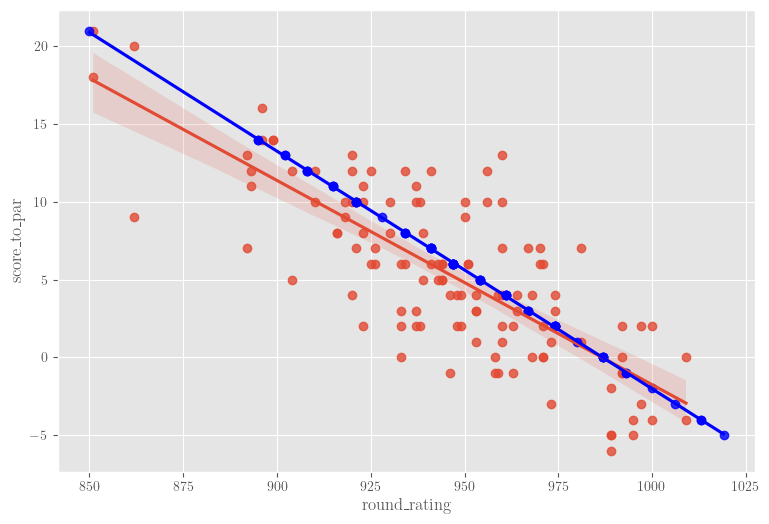

In [9]:
fig, axs = plt.subplots(1, 1, figsize = (9, 6))

sns.regplot(data=df, x="player_rating", y = "score_to_par")
#ax.set_title("Monkies")
#ax.set_xlabel("PDGA player rating")
#ax.set_ylabel("Round score relative course par")

sns.regplot(data=df[df['round'] == 1], x="round_rating", y = "score_to_par", color="blue")

#ax.legend()

plt.show()

## Regressing individual hole scores against player rating

Does hole par inherently affect regresssion slope?  Guessing yes.  Maybe compare only equally-parred holes to evaluate differentiation.

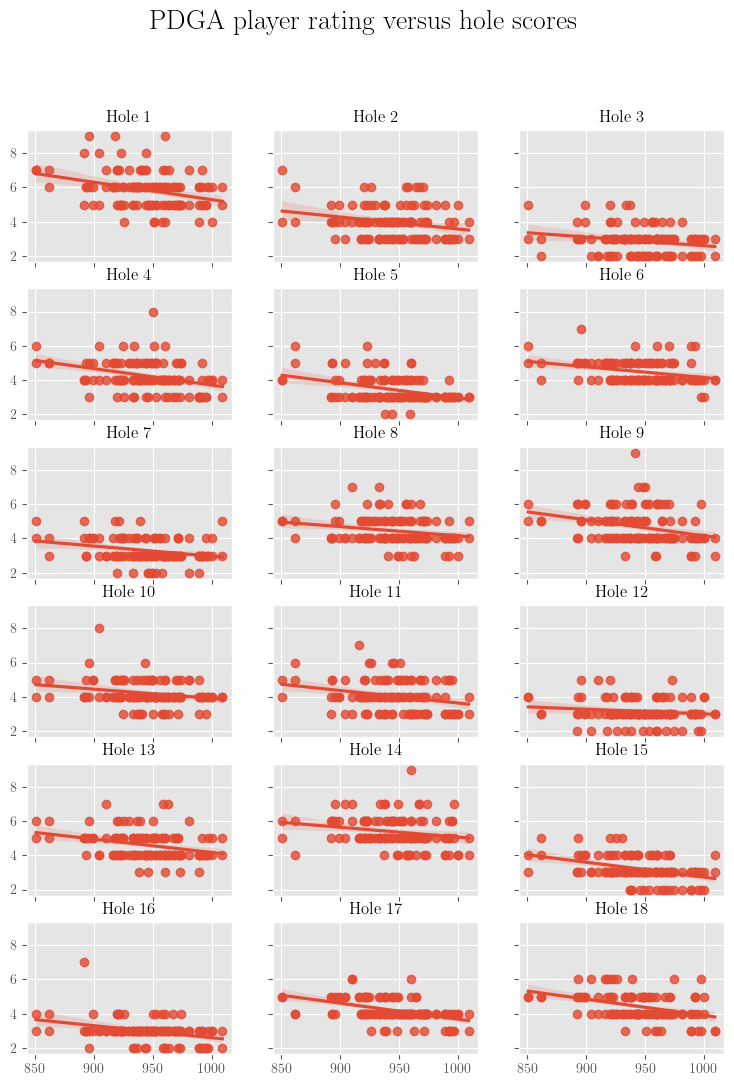

In [10]:
slopes = {}

fig, axs = plt.subplots(6, 3, sharey=True, sharex=True, figsize = (9, 12))
fig.suptitle("PDGA player rating versus hole scores", fontsize=20)

for i in range(1, 19):
    ax = axs[(i-1) // 3, (i-1)%3]
    
    p = sns.regplot(data=df, x="player_rating", y = f"Hole {i}", ax=ax)
    ax.set_xlabel("") # turn off to not interfere with sharex, sharey
    ax.set_ylabel("")
    ax.set_title(f"Hole {i}", fontsize=12)
    
    slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(), y=p.get_lines()[0].get_ydata())
    slopes[i] = slope
    
plt.show()

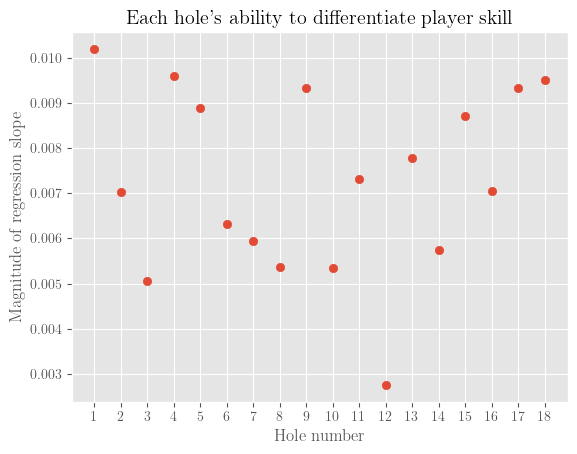

In [11]:
plt.scatter(slopes.keys(), [-1 * x for x in slopes.values()])
plt.xticks(range(1, 19))
plt.xlabel("Hole number")
plt.ylabel("Magnitude of regression slope")
plt.title("Each hole's ability to differentiate player skill")
plt.show()

In [12]:
s = {k: round(v, 4) for k, v in sorted(slopes.items(), key=lambda item: item[1])}
s.keys()

dict_keys([1, 4, 18, 17, 9, 5, 15, 13, 11, 16, 2, 6, 7, 14, 8, 10, 3, 12])

## Metadata

In [13]:
metadata['tournament_info']

{'DateRange': 'Saturday, Oct 18, 2025',
 'EndDate': '2025-10-18',
 'Country': 'United States',
 'Location': 'Quakertown, Pennsylvania',
 'LocationShort': 'Quakertown, PA',
 'Divisions': [{'DivisionID': 100,
   'Division': 'MPO',
   'DivisionName': 'Mixed Pro Open',
   'Players': 31,
   'IsPro': True,
   'ShortName': 'Mixed Pro Open',
   'AbbreviatedName': 'Mixed Pro Open',
   'LatestRound': 2},
  {'DivisionID': 111,
   'Division': 'MP40',
   'DivisionName': 'Mixed Pro 40+',
   'Players': 4,
   'IsPro': True,
   'ShortName': 'Mixed Pro 40+',
   'AbbreviatedName': 'Mixed Pro 40+',
   'LatestRound': 2},
  {'DivisionID': 121,
   'Division': 'MP50',
   'DivisionName': 'Mixed Pro 50+',
   'Players': 5,
   'IsPro': True,
   'ShortName': 'Mixed Pro 50+',
   'AbbreviatedName': 'Mixed Pro 50+',
   'LatestRound': 2},
  {'DivisionID': 400,
   'Division': 'MA1',
   'DivisionName': 'Mixed Amateur 1',
   'Players': 20,
   'IsPro': False,
   'ShortName': 'Mixed Amateur 1',
   'AbbreviatedName': 'Mixed